In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [16]:
plt.style.use("default")
sns.set_theme(
    context="paper",
    style="white",
    palette="icefire",
    font="serif",
    font_scale=1.5,
    color_codes=True,
    rc={"text.usetex": True},
)

In [17]:
os.makedirs("../figures/SPIRAL/", exist_ok=True)
fig_dir = "../figures/SPIRAL/"

In [18]:
output_dir = "../output"
static_epoch_files = glob.glob(output_dir + "/SPIRAL_STATIC/*/" + "epochs.txt")
static_control_files = glob.glob(output_dir + "/SPIRAL_STATIC/*/" + "controls.txt")
static_train_loss_files = glob.glob(
    output_dir + "/SPIRAL_STATIC/*/" + "train_losses.txt"
)
static_test_loss_files = glob.glob(output_dir + "/SPIRAL_STATIC/*/" + "test_losses.txt")
static_accuracy_files = glob.glob(
    output_dir + "/SPIRAL_STATIC/*/" + "test_accuracies.txt"
)

standard_epoch_files = glob.glob(output_dir + "/SPIRAL_STANDARD/*/" + "epochs.txt")
standard_control_files = glob.glob(output_dir + "/SPIRAL_STANDARD/*/" + "controls.txt")
standard_train_loss_files = glob.glob(
    output_dir + "/SPIRAL_STANDARD/*/" + "train_losses.txt"
)
standard_test_loss_files = glob.glob(
    output_dir + "/SPIRAL_STANDARD/*/" + "test_losses.txt"
)
standard_accuracy_files = glob.glob(
    output_dir + "/SPIRAL_STANDARD/*/" + "test_accuracies.txt"
)

In [19]:
epochs = np.loadtxt(static_epoch_files[0])

In [20]:
static_control_arrays = [np.loadtxt(f) for f in static_control_files]

mean_static_control = np.mean(static_control_arrays, axis=0)
std_static_control = np.std(static_control_arrays, axis=0)

In [21]:
standard_control_arrays = [np.loadtxt(f) for f in standard_control_files]

mean_standard_control = np.mean(standard_control_arrays, axis=0)
std_standard_control = np.std(standard_control_arrays, axis=0)

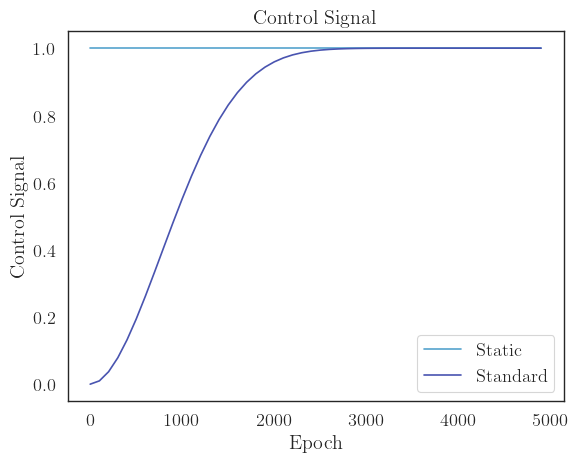

In [22]:
plt.figure()
plt.plot(epochs, mean_static_control, label="Static")
plt.plot(epochs, mean_standard_control, label="Standard")
plt.fill_between(
    epochs,
    mean_static_control - std_static_control,
    mean_static_control + std_static_control,
    alpha=0.5,
)
plt.fill_between(
    epochs,
    mean_standard_control - std_standard_control,
    mean_standard_control + std_standard_control,
    alpha=0.5,
)
plt.title("Control Signal")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Control Signal")

plt.savefig(fig_dir + "control_signal.png")
plt.savefig(fig_dir + "control_signal.pdf")
plt.savefig(fig_dir + "control_signal.svg")

In [23]:
static_train_loss_arrays = [np.loadtxt(f) for f in static_train_loss_files]

mean_static_train_loss = np.mean(static_train_loss_arrays, axis=0)
std_static_train_loss = np.std(static_train_loss_arrays, axis=0)

standard_train_loss_arrays = [np.loadtxt(f) for f in standard_train_loss_files]

mean_standard_train_loss = np.mean(standard_train_loss_arrays, axis=0)
std_standard_train_loss = np.std(standard_train_loss_arrays, axis=0)

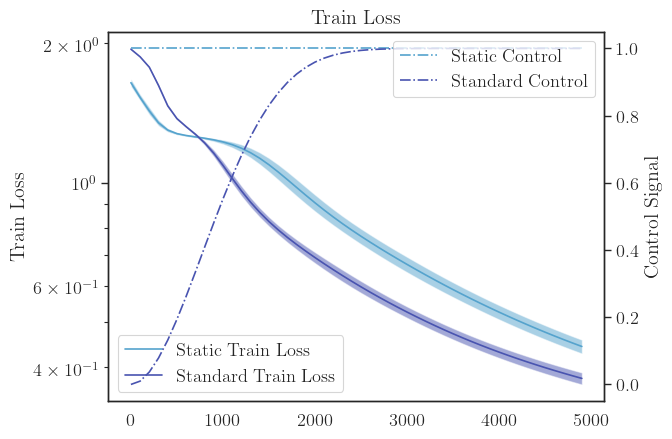

In [24]:
fig, ax1 = plt.subplots()

# Plot train loss on the left y-axis
ax1.plot(epochs, mean_static_train_loss, label="Static Train Loss")
ax1.plot(epochs, mean_standard_train_loss, label="Standard Train Loss")
ax1.fill_between(
    epochs,
    mean_static_train_loss - std_static_train_loss,
    mean_static_train_loss + std_static_train_loss,
    alpha=0.5,
)
ax1.fill_between(
    epochs,
    mean_standard_train_loss - std_standard_train_loss,
    mean_standard_train_loss + std_standard_train_loss,
    alpha=0.5,
)
ax1.set_ylabel("Train Loss")
ax1.set_yscale("log")
ax1.legend(loc="lower left")

# Create a second y-axis for the control signal
ax2 = ax1.twinx()
ax2.plot(epochs, mean_static_control, "-.", label="Static Control")
ax2.plot(epochs, mean_standard_control, "-.", label="Standard Control")
ax2.set_ylabel("Control Signal")
ax2.legend(loc="upper right")

plt.title("Train Loss")

plt.savefig(fig_dir + "train_loss.png")
plt.savefig(fig_dir + "train_loss.pdf")
plt.savefig(fig_dir + "train_loss.svg")

In [25]:
static_test_loss_arrays = [np.loadtxt(f) for f in static_test_loss_files]

mean_static_test_loss = np.mean(static_test_loss_arrays, axis=0)
std_static_test_loss = np.std(static_test_loss_arrays, axis=0)

standard_test_loss_arrays = [np.loadtxt(f) for f in standard_test_loss_files]

mean_standard_test_loss = np.mean(standard_test_loss_arrays, axis=0)
std_standard_test_loss = np.std(standard_test_loss_arrays, axis=0)

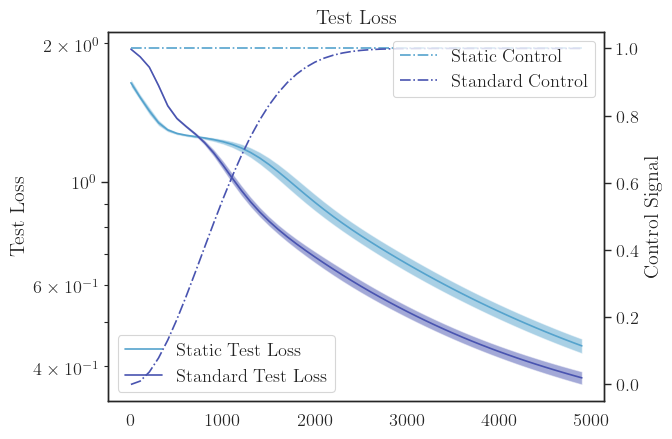

In [26]:
fig, ax1 = plt.subplots()

# Plot train loss on the left y-axis
ax1.plot(epochs, mean_static_test_loss, label="Static Test Loss")
ax1.plot(epochs, mean_standard_test_loss, label="Standard Test Loss")
ax1.fill_between(
    epochs,
    mean_static_test_loss - std_static_test_loss,
    mean_static_test_loss + std_static_test_loss,
    alpha=0.5,
)
ax1.fill_between(
    epochs,
    mean_standard_test_loss - std_standard_test_loss,
    mean_standard_test_loss + std_standard_test_loss,
    alpha=0.5,
)
ax1.set_ylabel("Test Loss")
ax1.set_yscale("log")
ax1.legend(loc="lower left")

# Create a second y-axis for the control signal
ax2 = ax1.twinx()
ax2.plot(epochs, mean_static_control, "-.", label="Static Control")
ax2.plot(epochs, mean_standard_control, "-.", label="Standard Control")
ax2.set_ylabel("Control Signal")
ax2.legend(loc="upper right")

plt.title("Test Loss")

plt.savefig(fig_dir + "test_loss.png")
plt.savefig(fig_dir + "test_loss.pdf")
plt.savefig(fig_dir + "test_loss.svg")

In [27]:
static_test_accuracy_arrays = [np.loadtxt(f) for f in static_accuracy_files]

mean_static_test_accuracy = np.mean(static_test_accuracy_arrays, axis=0)
std_static_test_accuracy = np.std(static_test_accuracy_arrays, axis=0)

standard_test_accuracy_arrays = [np.loadtxt(f) for f in standard_accuracy_files]

mean_standard_test_accuracy = np.mean(standard_test_accuracy_arrays, axis=0)
std_standard_test_accuracy = np.std(standard_test_accuracy_arrays, axis=0)

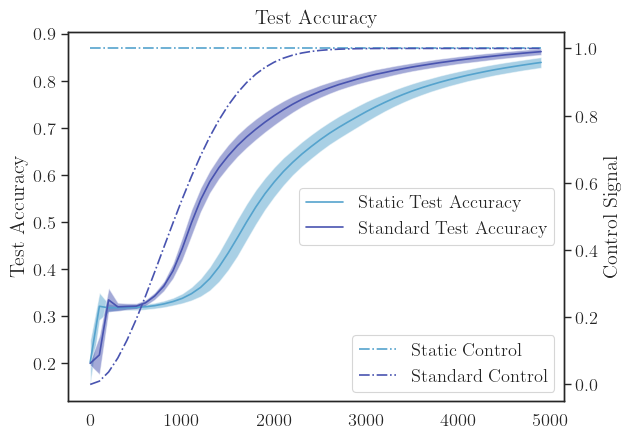

In [28]:
fig, ax1 = plt.subplots()

# Plot train loss on the left y-axis
ax1.plot(epochs, mean_static_test_accuracy, label="Static Test Accuracy")
ax1.plot(epochs, mean_standard_test_accuracy, label="Standard Test Accuracy")
ax1.fill_between(
    epochs,
    mean_static_test_accuracy - std_static_test_accuracy,
    mean_static_test_accuracy + std_static_test_accuracy,
    alpha=0.5,
)
ax1.fill_between(
    epochs,
    mean_standard_test_accuracy - std_standard_test_accuracy,
    mean_standard_test_accuracy + std_standard_test_accuracy,
    alpha=0.5,
)
ax1.set_ylabel("Test Accuracy")
ax1.legend(loc="center right")

# Create a second y-axis for the control signal
ax2 = ax1.twinx()
ax2.plot(epochs, mean_static_control, "-.", label="Static Control")
ax2.plot(epochs, mean_standard_control, "-.", label="Standard Control")
ax2.set_ylabel("Control Signal")
ax2.legend(loc="lower right")

plt.title("Test Accuracy")

plt.savefig(fig_dir + "test_accuracy.png")
plt.savefig(fig_dir + "test_accuracy.pdf")
plt.savefig(fig_dir + "test_accuracy.svg")